In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# 폰트 설정
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=10)
# plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['axes.unicode_minus'] = False

font_path='/System/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False
data_path = './data/geo/'

원본 배치 텐서 shape: (5, 32, 32, 3)
리사이즈 후 shape: (5, 64, 64, 3)
첫 번째 이미지 shape: (64, 64, 3)
미니배치(3장) shape: (3, 64, 64, 3)
채널 우선 배치 shape: (5, 3, 64, 64)


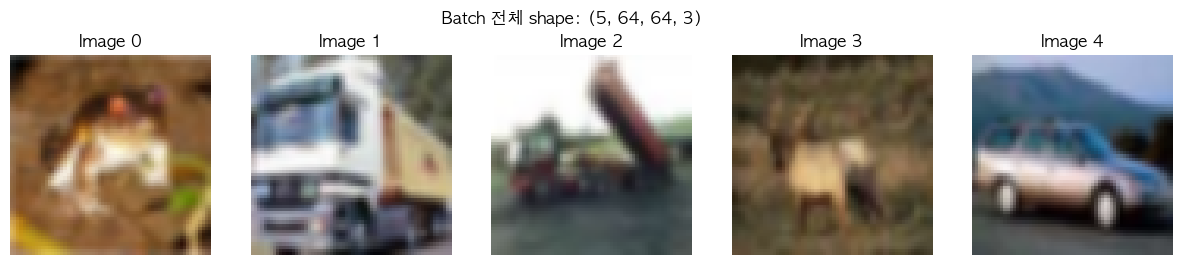

흑백 배치 shape: (5, 64, 64, 1)
흑백 3D shape: (5, 64, 64)
tf.Tensor(
[[[ 61.2111  ]
  [ 57.1545  ]
  [ 49.0413  ]
  ...
  [130.01865 ]
  [129.18436 ]
  [128.7672  ]]

 [[ 50.608925]
  [ 46.391327]
  [ 37.956127]
  ...
  [120.26418 ]
  [120.14379 ]
  [120.0836  ]]

 [[ 29.404575]
  [ 24.864975]
  [ 15.785775]
  ...
  [100.75524 ]
  [102.06268 ]
  [102.71641 ]]

 ...

 [[147.41858 ]
  [143.23582 ]
  [134.87033 ]
  ...
  [ 79.60383 ]
  [ 72.92857 ]
  [ 69.59095 ]]

 [[149.57773 ]
  [145.84962 ]
  [138.39343 ]
  ...
  [105.01868 ]
  [ 94.460526]
  [ 89.18145 ]]

 [[150.6573  ]
  [147.15652 ]
  [140.15498 ]
  ...
  [117.726105]
  [105.2265  ]
  [ 98.9767  ]]], shape=(64, 64, 1), dtype=float32)
----------


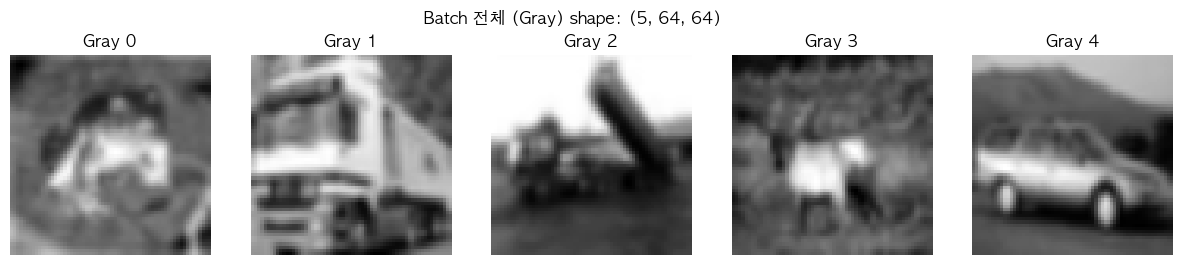

In [5]:


# 1. TensorFlow 내장 CIFAR-10 데이터셋에서 이미지 5장만 사용
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
images = x_train[:5]      # shape: (5, 32, 32, 3)

# 2. 배치 텐서 shape 확인
print("원본 배치 텐서 shape:", images.shape)  # (5, 32, 32, 3)

# 3. 크기를 64x64로 업샘플링 (옵션: shape 변화 실습)
images_resized = tf.image.resize(images, [64, 64])  # (5, 64, 64, 3)
print("리사이즈 후 shape:", images_resized.shape)

# 4. 배치 텐서의 인덱싱, 슬라이싱
print("첫 번째 이미지 shape:", images_resized[0].shape)
mini_batch = images_resized[:3]
print("미니배치(3장) shape:", mini_batch.shape)  # (3, 64, 64, 3)

# 5. 배치 텐서의 차원 변환(채널 앞으로)
batch_ch_first = tf.transpose(images_resized, [0, 3, 1, 2])  # (5, 3, 64, 64)
print("채널 우선 배치 shape:", batch_ch_first.shape)

# 6. 배치 전체 시각화 (5장)
plt.figure(figsize=(15,3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images_resized[i].numpy().astype('uint8'))
    plt.title(f"Image {i}")
    plt.axis('off')
plt.suptitle(f"Batch 전체 shape: {images_resized.shape}")
plt.show()

# 7. 배치 전체 흑백 변환 (RGB->Gray)
batch_gray = tf.image.rgb_to_grayscale(images_resized)   # (5, 64, 64, 1)
print("흑백 배치 shape:", batch_gray.shape)
batch_gray2d = tf.squeeze(batch_gray, axis=-1)           # (5, 64, 64)
print("흑백 3D shape:", batch_gray2d.shape)
print(batch_gray[0])
print("----------")
# print(batch_gray2d[0])

# 8. 흑백 이미지 시각화
plt.figure(figsize=(15,3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(batch_gray2d[i].numpy().astype('uint8'), cmap='gray')
    plt.title(f"Gray {i}")
    plt.axis('off')
plt.suptitle(f"Batch 전체 (Gray) shape: {batch_gray2d.shape}")
plt.show()
